In [21]:
import numpy as np
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# Function to extract spatial frequency features using Fourier Transform
def extract_spatial_frequency_features(image):
    # Apply Fourier Transform
    f_transform = np.fft.fft2(image)
    # Shift the zero frequency component to the center
    f_shift = np.fft.fftshift(f_transform)
    # Extract magnitude and phase
    magnitude = 20 * np.log(np.abs(f_shift))
    phase = np.angle(f_shift)
    return magnitude.flatten(), phase.flatten()


# Define Autoencoder architecture
def create_autoencoder(input_dim, encoding_dim):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=(input_dim,)))
    model.add(layers.Dense(encoding_dim, activation='relu'))
    model.add(layers.Dense(input_dim, activation='sigmoid'))
    return model





# Path to your dataset
dataset_path = "/content/drive/MyDrive/Colab Notebooks/Images"

# Get a list of folder names (assuming they are named 1, 2, 3, ..., 120)
folder_names = [str(i) for i in range(1, 121)]

# List to store clustering results for each folder
all_folder_clusters = []
reduced_images_list = []  # List to store reduced images for the first 6 iterations

cntr = 0

for folder_name in folder_names:
     # Construct the path to the current folder
    folder_path = os.path.join(dataset_path, folder_name)

    # Get a list of image file paths in the current folder
    image_paths = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path) if filename.endswith('.png')]

    # Check if there are at least 5 images in the folder
    if len(image_paths) <= 5:
        print(f"Skipping folder {folder_name} as it has less than 5 images.")
        continue
    cntr = cntr + 1

    # Load and preprocess images
    images = [np.array(Image.open(path).convert('L')) for path in image_paths]

    # Extract spatial frequency features
    all_magnitudes = []
    all_phases = []
    for image in images:
        magnitude, phase = extract_spatial_frequency_features(image)
        all_magnitudes.append(magnitude)
        all_phases.append(phase)

    # You can choose to use either magnitude, phase, or both for clustering
    features = np.concatenate([all_magnitudes, all_phases], axis=1)  # or np.array(all_phases) or np.concatenate([all_magnitudes, all_phases], axis=1)

    # Standardize the extracted features
    scaler = StandardScaler()
    standardized_features = scaler.fit_transform(features)
    # Apply PCA to reduce dimensionality
    pca = PCA(n_components=0.95)  # Adjust n_components as needed
    pca_features = pca.fit_transform(standardized_features)

    # Save reduced images for the first 6 iterations
    if cntr <= 6:
        reduced_images_list.append(pca_features)  # Changed to pca_features
    else:
        break

    # Use K-Means clustering on the PCA-transformed features
    kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(pca_features)  # Changed to pca_features

    # Append the clustering results for the current folder to the list
    all_folder_clusters.append(clusters)



Skipping folder 2 as it has less than 5 images.
Skipping folder 3 as it has less than 5 images.
Skipping folder 6 as it has less than 5 images.
Skipping folder 7 as it has less than 5 images.
Skipping folder 9 as it has less than 5 images.
Skipping folder 12 as it has less than 5 images.
Skipping folder 13 as it has less than 5 images.


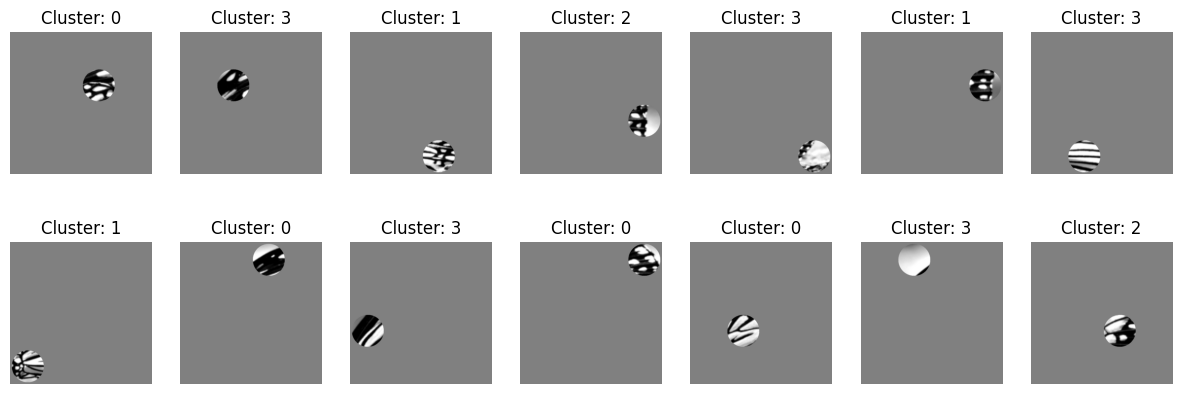

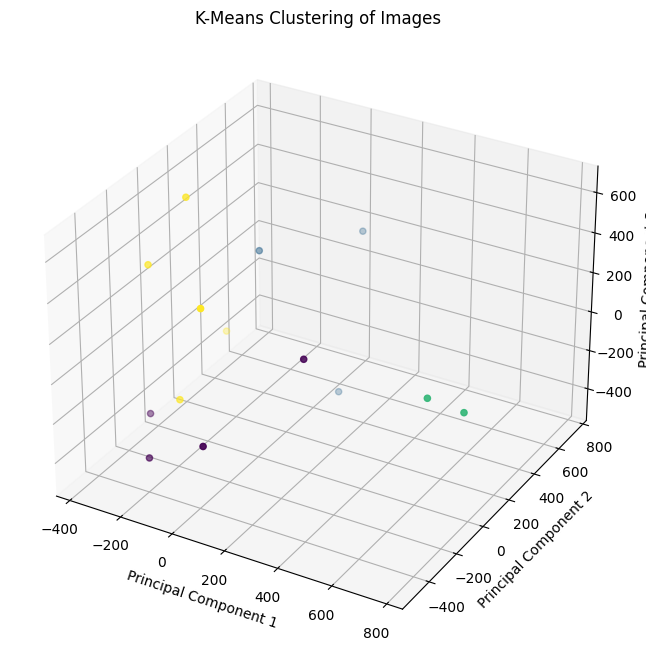

In [22]:
fig, axes = plt.subplots(2, 7, figsize=(15, 5))

clusters = all_folder_clusters[0]
image_folder = "/content/drive/MyDrive/Colab Notebooks/Images/1"
image_paths = [os.path.join(image_folder, file) for file in os.listdir(image_folder) if file.endswith(('.png', '.jpg', '.jpeg'))]
axes = axes.flatten()

# Show each image in their respective clusters
for i, path in enumerate(image_paths):
    img = Image.open(path)
    cluster_label = clusters[i]

    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f'Cluster: {cluster_label}')
    axes[i].axis('off')

plt.show()
reduced_images = reduced_images_list[0]
# Visualize the results in 3D
fig_3d = plt.figure(figsize=(10, 8))
ax_3d = fig_3d.add_subplot(111, projection='3d')

ax_3d.scatter(reduced_images[:, 0], reduced_images[:, 1], reduced_images[:, 2], c=clusters, cmap='viridis')
ax_3d.set_title('K-Means Clustering of Images')
ax_3d.set_xlabel('Principal Component 1')
ax_3d.set_ylabel('Principal Component 2')
ax_3d.set_zlabel('Principal Component 3')

plt.show()

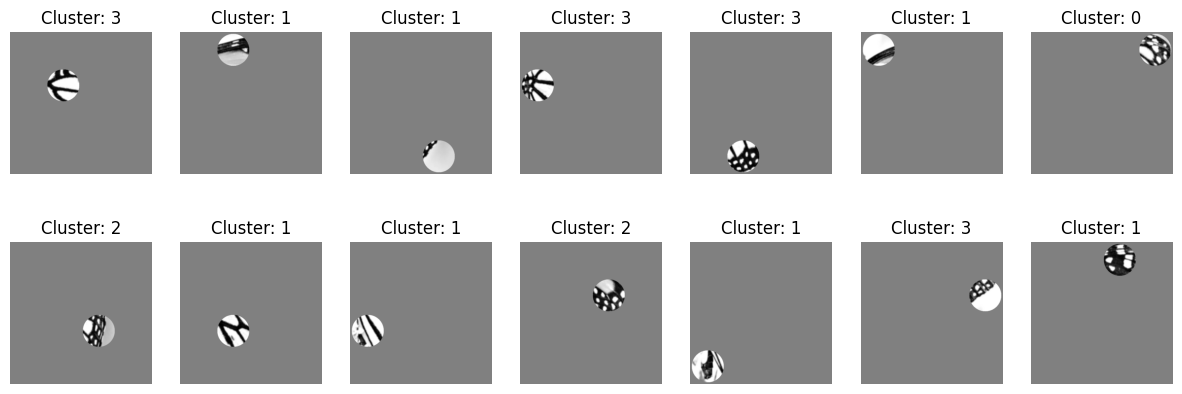

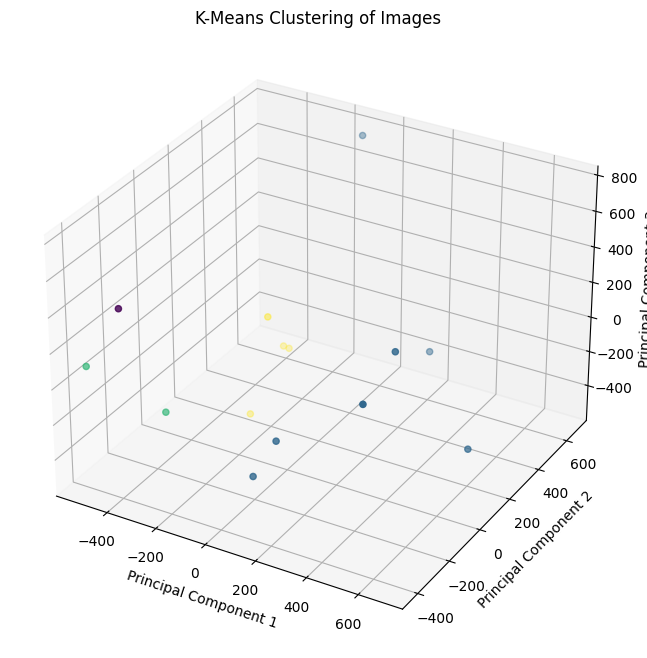

In [23]:
fig, axes = plt.subplots(2, 7, figsize=(15, 5))

clusters = all_folder_clusters[2]
image_folder = "/content/drive/MyDrive/Colab Notebooks/Images/5"
image_paths = [os.path.join(image_folder, file) for file in os.listdir(image_folder) if file.endswith(('.png', '.jpg', '.jpeg'))]
axes = axes.flatten()

# Show each image in their respective clusters
for i, path in enumerate(image_paths):
    img = Image.open(path)
    cluster_label = clusters[i]

    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f'Cluster: {cluster_label}')
    axes[i].axis('off')

plt.show()
reduced_images = reduced_images_list[2]
# Visualize the results in 3D
fig_3d = plt.figure(figsize=(10, 8))
ax_3d = fig_3d.add_subplot(111, projection='3d')

ax_3d.scatter(reduced_images[:, 0], reduced_images[:, 1], reduced_images[:, 2], c=clusters, cmap='viridis')
ax_3d.set_title('K-Means Clustering of Images')
ax_3d.set_xlabel('Principal Component 1')
ax_3d.set_ylabel('Principal Component 2')
ax_3d.set_zlabel('Principal Component 3')

plt.show()
